In [1]:
%pip install -q numpy
%pip install -q pandas
%pip install -q matplotlib
%pip install -q seaborn
%pip install -q scipy
%pip install -q scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Standard library imports
import warnings

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
sys.path.append(r"C:\Users\ALAN\Documents\GitHub\Data_engineer_project_creation")

In [4]:
from created_functions.model_selection import *

In [5]:
file_path = "../Datasets/pre_modeling_dataset.csv"
data = pd.read_csv(file_path)
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,Lifestyle_Risk_Score,High_Risk_Cholesterol,High_Heart_Risk,Low_Exercise_High_Stress,Age_Group,BMI_Category,Blood_Pressure_Level,Diabetes_Risk,Low_Sleep,Lifestyle_Risk_Count
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,5,0,1,0,Senior,Overweight,Hypertension,0,0,2
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,4,0,0,0,Senior,Overweight,Hypertension,1,0,0
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,0,1,0,0,Middle Age,Overweight,Elevated,0,1,1
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,5,0,1,0,Young Adult,Normal,Elevated,0,1,1
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,3,0,1,1,Senior,Normal,Hypertension,1,0,2


# Preparing the dataset for modeling
--- 
Here, Age-extracted sampling will be used, as demonstrated in the file 2_pre_modeling

In [6]:
columns_to_replace = ["Smoking", "Family Heart Disease", "Diabetes", "High Blood Pressure", "Low HDL Cholesterol", "High LDL Cholesterol", "Heart Disease Status"]
data = replace_yes_no(data, columns_to_replace)

In [7]:
categorical_columns = ["Gender", "Exercise Habits", "Alcohol Consumption", "Stress Level", "Sugar Consumption", "Age_Group", "BMI_Category", "Blood_Pressure_Level"]
non_categorical_columns = [col for col in data.columns if col not in categorical_columns]
transformed_data, encoder = encode_categorical_to_numpy(data, categorical_columns, non_categorical_columns)

In [8]:
print("Data type of transformed_data:", transformed_data.dtype)  # Need be float or int

Data type of transformed_data: float64


In [9]:
y_age = data["Age"].values

In [10]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
y_age = data["Age"].values 

for train_index, test_index in split.split(transformed_data, y_age):
    strat_train_set = transformed_data[train_index]
    strat_test_set = transformed_data[test_index]

In [11]:
X_train = strat_train_set[:, :-1]
y_train = strat_train_set[:, -1]
X_test = strat_test_set[:, :-1]
y_test = strat_test_set[:, -1]

# Linear Regression model evaluation

In [12]:
# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R^2 Score: 1.00
Explained Variance: 1.00


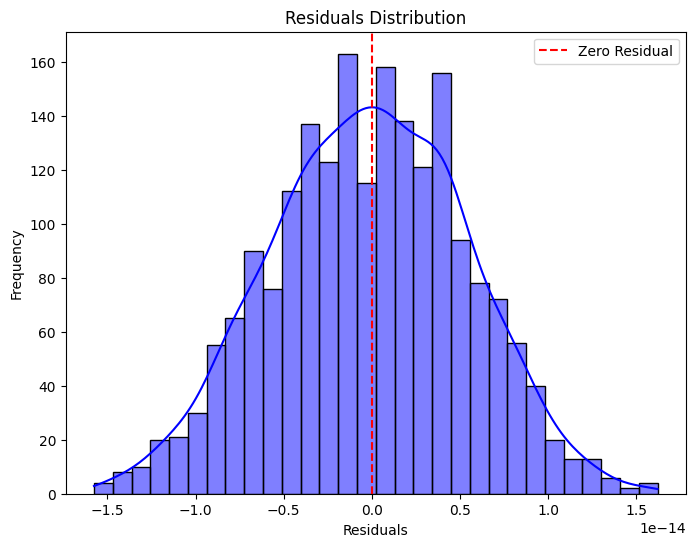

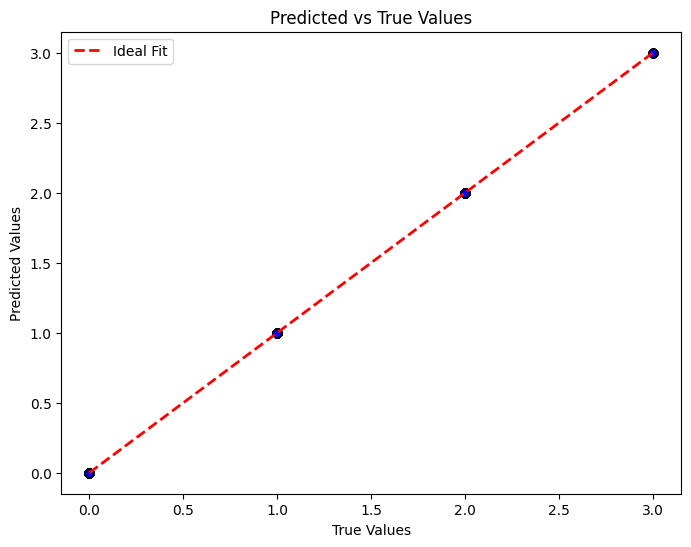

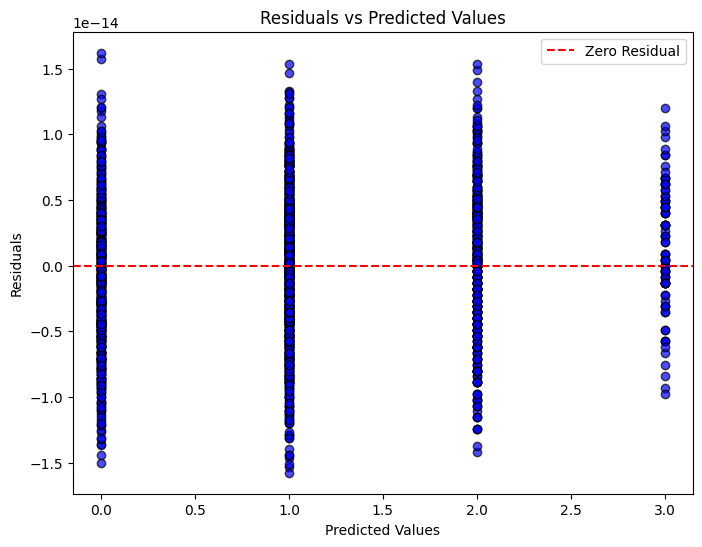

In [13]:
y_pred = model.predict(X_test)
evaluate_regression_model(model, X_test, y_test, y_pred)

# Decision Tree model evaluation

In [14]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

Decision Tree Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R^2 Score: 1.00


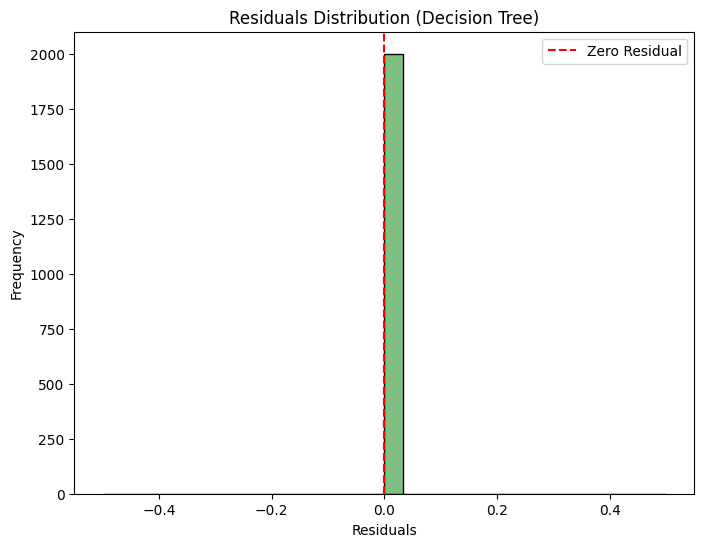

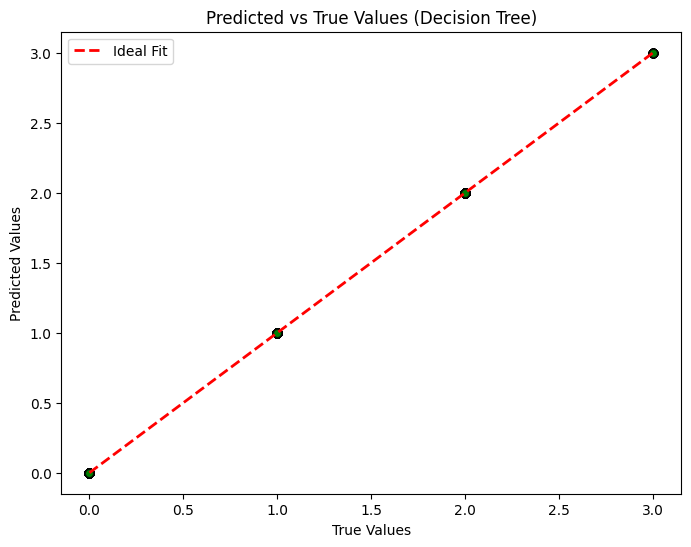

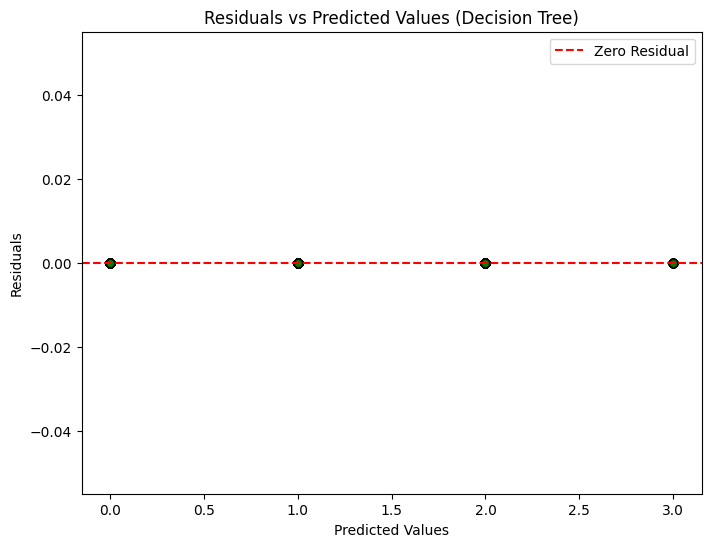

In [15]:
feature_names = [col for col in data.columns if col != 'Heart Disease Status']
y_pred_tree = tree_model.predict(X_test)
evaluate_decision_tree_model(tree_model, X_test, y_test, y_pred_tree, feature_names=feature_names)